# Support Vector Machine SVM

Son modelos de aprendizaje supervisado con algoritmos de aprendizaje asociados que analizan los datos historicos para el análisis de clasificación y regresión. Sin embargo, se utilizan principalmente en problemas de clasificación.

# Librerias

In [3]:
import pandas as pd 
import numpy as np
import pandas_profiling
import seaborn as sns
import sklearn as sk
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score
import pickle
from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

# Load Sample

Utilizamos el dataset que hemos dejado al final de notebook anterior, despues de hacer el EDA y feature engineering

In [2]:
X_ada = pd.read_csv('../data/X_ada.csv', engine = 'python')
y_ada = pd.read_csv('../data/y_ada.csv', engine = 'python')
X_test = pd.read_csv('../data/X_test.csv', engine = 'python')
y_test = pd.read_csv('../data/y_test.csv', engine = 'python')

# Standarization Model

Due to having 58 variables in our dataset, we need to proceed to standarize our data, to ensure uniformity to certain practices within the industry.

In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ada = scaler.fit_transform(X_ada)
X_test= scaler.fit_transform(X_test)

# Model

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

According to the SVM algorithm we find the points closest to the line from both the classes.These points are called support vectors. Now, we compute the distance between the line and the support vectors. This distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane.

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [4]:
clf_svm = SVC(random_state = 123)
clf_svm.fit(X_ada, y_ada)

SVC(random_state=123)

We proceed with the prediction base on the model we just built, and to calculate the following indicators:

 - Confusion Matrix
 - Accuracy score.
 - Recall Score.
 - Precision.
 - Roc Auc score.
 - F1 score

In [6]:
y_class = clf_svm.predict(X_test) 

#### Confussion Matrix

In [7]:
confusion_matrix(y_test, y_class)

array([[20275,   161],
       [15421, 47011]], dtype=int64)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix(y_test, y_class))

According to our confussion Matrix we can interpretate the following:

 - 20.275 True Negatives. We have predicted "Charged Off" and in real they are "Charged Off".
 - 161 False Positives. We have predicted "Fully Paid" in reality "Charged Off".
 - 15.421 Flase Negatives. We have predicted "Charge Off" in reality "Full Paid".
 - 47.011 True Postives. We have predicted "Fully Paid" and in real they are "Fully Paid".

Of a total sample of 81.890 observations our model has predicted wrong 15.582, which is a 19% of the total

#### Accuracy Score

In [9]:
accuracy_score(y_test, y_class)

0.811966018245885

With this model we were able to obtain a 81,90% of accuracy, which means if we have 100 observation we are able to predict altmost 82% right. The issue with this score is when our model is imbalanced, meaning this score can deceive us into believing that a bad model is a good model. So to be certain we are going to use the balanced_accuracy.

In [10]:
balanced_accuracy_score(y_test, y_class, sample_weight=None, adjusted=False)

0.8725585023900797

#### Recall Score & Precision Score

In [11]:
recall_score(y_test, y_class)

0.7529952588416197

The ratio is number of true positives/(true positives + false negatives), it informs us about the quantity that our model can predict being 1 the best value and 0 the worst values, in our case we have obtain an outstanding result

We measure the quality of our model, the formula is TruePositive/(TruePositives+FalsePositives)

In [12]:
precision_score(y_test, y_class)

0.9965869583651319

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative being best value 1 and worst value 0.

We have obtain a rather unusual Recall & Precision score, normally this scores have an inverse correlation, so how is it possible to have obtain a rather great scores, several reasons:

 - Imbalanced Sample.
 - We have missed important variables in our selection.
 - Our model is so train that is bias towards certain results.
 - We have created a great model

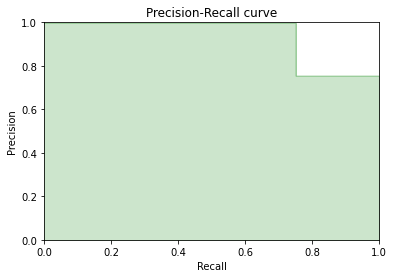

In [14]:
#Precision-Recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _= precision_recall_curve(y_test, y_class)
plt.step(recall, precision, color='g', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()


#### F1 Score

In [15]:
from sklearn.metrics import f1_score

def f1score (a, b):
    return (precision_score(y_test, y_class)*recall_score(y_test, y_class))/(precision_score(y_test, y_class)+recall_score(y_test, y_class))


In [16]:
f1score(y_test, y_class)

0.42891682785299806

Our f1 score show us that the mean between the precision score and the recall score, being a 45% we consider is a good result and our model focueses both in recall and precision, so if we wanted to increase one over the other there would not be any inconvineance.

#### Roc Auc Score

The ROC is created by the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning.

In [17]:
roc_auc_score(y_test, y_class)

0.8725585023900797

The roc curve shows us in a simple way the probability that our model clasifies a random observation into a TP rahter that FP in diferent thresholds. Our AUC is 80%, which means that are predictions are 80% correct. However, in this particular case we want to identify as much False positives as possible, as they are people who are not going to receive the loan, when in reality they should recieve it.

### Conclusion

In [22]:
print("The results of our SVM")


print("accuracy score", accuracy_score(y_test, y_class))
print("balanced accuracy score", balanced_accuracy_score(y_test, y_class))
print("recall score", recall_score(y_test, y_class))
print("precision score", precision_score(y_test, y_class))
print("roc auc score", roc_auc_score(y_test, y_class))

The results of our SVM
accuracy score 0.811966018245885
balanced accuracy score 0.8725585023900797
recall score 0.7529952588416197
precision score 0.9965869583651319
roc auc score 0.8725585023900797


In [ ]:
pickle.dump(clf_svm, open("svm", "wb"))

After reviewing several of the results we have concluded the following:

    1) Our dataset is imbalance so the results we have obtain are normal because they are biased.
    2) Our model is so train that the bias affects our results.
    3) During the selection of the variables we have add or remove important variable that affect the results.
    4) We have built a very robust and precise model.

### References

To built our model we have search many sources of informaction through the internet.

https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451 # parameters

https://scikit-learn.org/stable/modules/naive_bayes.html # naive model

https://towardsdatascience.com/tagged/scikit-learn # sk

https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf # pipelines

https://medium.com/@benfenison/gridsearching-a-random-forest-classifier-fc225609699c # rf

https://medium.com/fintechexplained/how-to-save-trained-machine-learning-models-649c3ad1c018 # pickle

https://machinelearningmastery.com/rfe-feature-selection-in-python/ # feature engineering

https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c # precision and recall

https://towardsdatascience.com/meaningful-metrics-cumulative-gains-and-lyft-charts-7aac02fc5c14 # cumulative gain

https://towardsdatascience.com/evaluate-model-performance-with-cumulative-gains-and-lift-curves-1f3f8f79da01 # cumulative gain

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/#:~:text=true%20positives%20(TP)%3A%20These,they%20do%20have%20the%20disease.&text=false%20positives%20(FP)%3A%20We,actually%20do%20have%20the%20disease. # confusion matrix


https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c# roc curve

